**Steps of Sales Prediction Problem**

* **Hypothesis Generation** – understanding the problem better by brainstorming possible factors that can impact the outcome
* **Data Exploration** – looking at categorical and continuous feature summaries and making inferences about the data.
* **Data Cleaning** – imputing missing values in the data and checking for outliers
* **Feature Engineering** – modifying existing variables and creating new ones for analysis
* **Model Building** – making predictive models on the data





In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
#from google.colab import files
#from google.colab import drive


In [ ]:
#Mount Google Drive for file path
#drive.mount('/content/drive')

In [2]:
#upload files
#uploaded = files.upload()
#url = "/content/drive/My Drive/Colab Notebooks/data-big-mart/Train.csv";
url = "data/Train.csv"
train = pd.read_csv(url);
#url = "/content/drive/My Drive/Colab Notebooks/data-big-mart/Test.csv";
url = "data/Test.csv"
test = pd.read_csv(url);

In [3]:
print(train.shape, test.shape);
print(train.sample(5), test.sample(5));

(8523, 12) (5681, 11)
     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
5678           FDG58       10.695          Regular         0.087272   
6323           FDJ53          NaN          Low Fat         0.070913   
1510           FDL57       15.100          Regular         0.067350   
6162           NCS30        5.945          Low Fat         0.155707   
6320           FDC41          NaN          Low Fat         0.116347   

         Item_Type  Item_MRP Outlet_Identifier  Outlet_Establishment_Year  \
5678   Snack Foods  153.7972            OUT017                       2007   
6323  Frozen Foods  121.5098            OUT027                       1985   
1510   Snack Foods  257.3304            OUT018                       2009   
6162     Household  127.9652            OUT010                       1998   
6320  Frozen Foods   76.8670            OUT027                       1985   

     Outlet_Size Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  
5678      

In [4]:
#combining the dataset with a source column to record where each observation belong
train['source'] = 'train';
test['source'] = 'test';

data = pd.concat([train, test],ignore_index=True, sort=False);
print (train.shape, test.shape, data.shape);

(8523, 13) (5681, 12) (14204, 13)


In [5]:
#Checking for Missing Values in all Numerical variables
data.isnull().sum().sort_values(ascending=False)

Item_Outlet_Sales            5681
Outlet_Size                  4016
Item_Weight                  2439
source                          0
Outlet_Type                     0
Outlet_Location_Type            0
Outlet_Establishment_Year       0
Outlet_Identifier               0
Item_MRP                        0
Item_Type                       0
Item_Visibility                 0
Item_Fat_Content                0
Item_Identifier                 0
dtype: int64

Item Outlet Sales is our target variable and the missing values are from  the test dataset

In [6]:
#checking the unique values for all categorical variables
data.apply(lambda x:len(x.unique()))

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      4
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
source                           2
dtype: int64

In [7]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


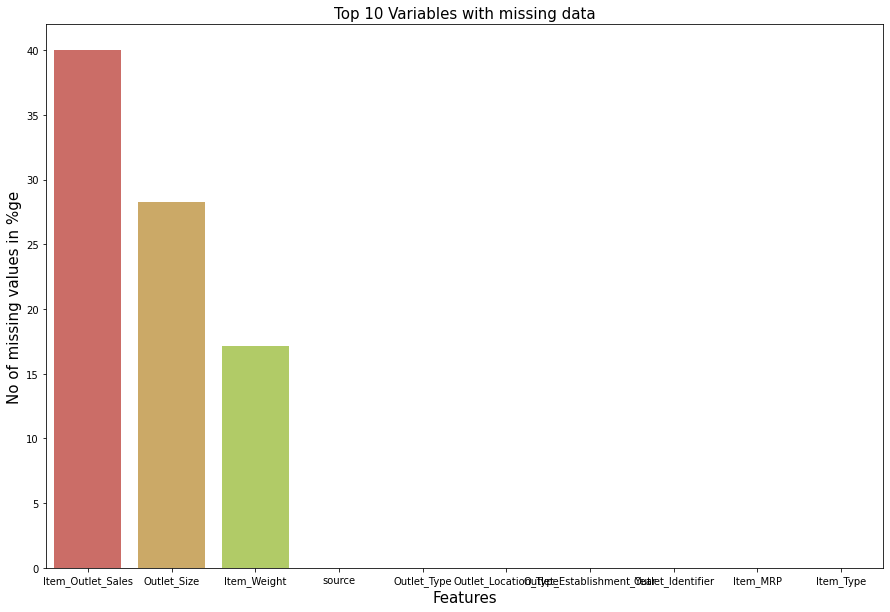

In [8]:
missing_values_count = ((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending=False)
plt.figure(figsize=(15,10))
plt.xlabel('Features', fontsize=15)
plt.ylabel('No of missing values in %ge', fontsize=15)
plt.title('Top 10 Variables with missing data', fontsize=15)
sns.barplot(missing_values_count[:10].index.values, missing_values_count[:10],palette="hls")



So, we can exclude Item_Outlet_sales since the missing values are from test set. we should treat Outlet_Size and Item_Weight features for missing values

In [10]:
#Treating Missing Values
#we will add avg item weight to the missing values
#full_ds["LotFrontage"] = full_ds.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median())) 
data['Item_Weight'].isnull().sum()
data['Item_Weight'] = data['Item_Weight'].fillna(data['Item_Weight'].mean())


In [11]:
#Outlet Size
data['Outlet_Size'] = data["Outlet_Size"].fillna(data["Outlet_Size"].mode()[0])
print (data['Item_Weight'].isnull().sum())
print (data['Item_Weight'].isnull().sum())

0
0


In [21]:
#Filter Categorical Variables & Explore frequency of different categories in categorical variable
categorical_feats = data.dtypes[data.dtypes == "object"].index
numerical_feats = data.dtypes[data.dtypes != "object"].index
categorical_feats = [x for x in categorical_feats if x not in ['Item_Identifier','Outlet_Identifier','source']]
print (categorical_feats)
print (numerical_feats)

['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Type_Combined']
Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales', 'Outlet_Years'],
      dtype='object')


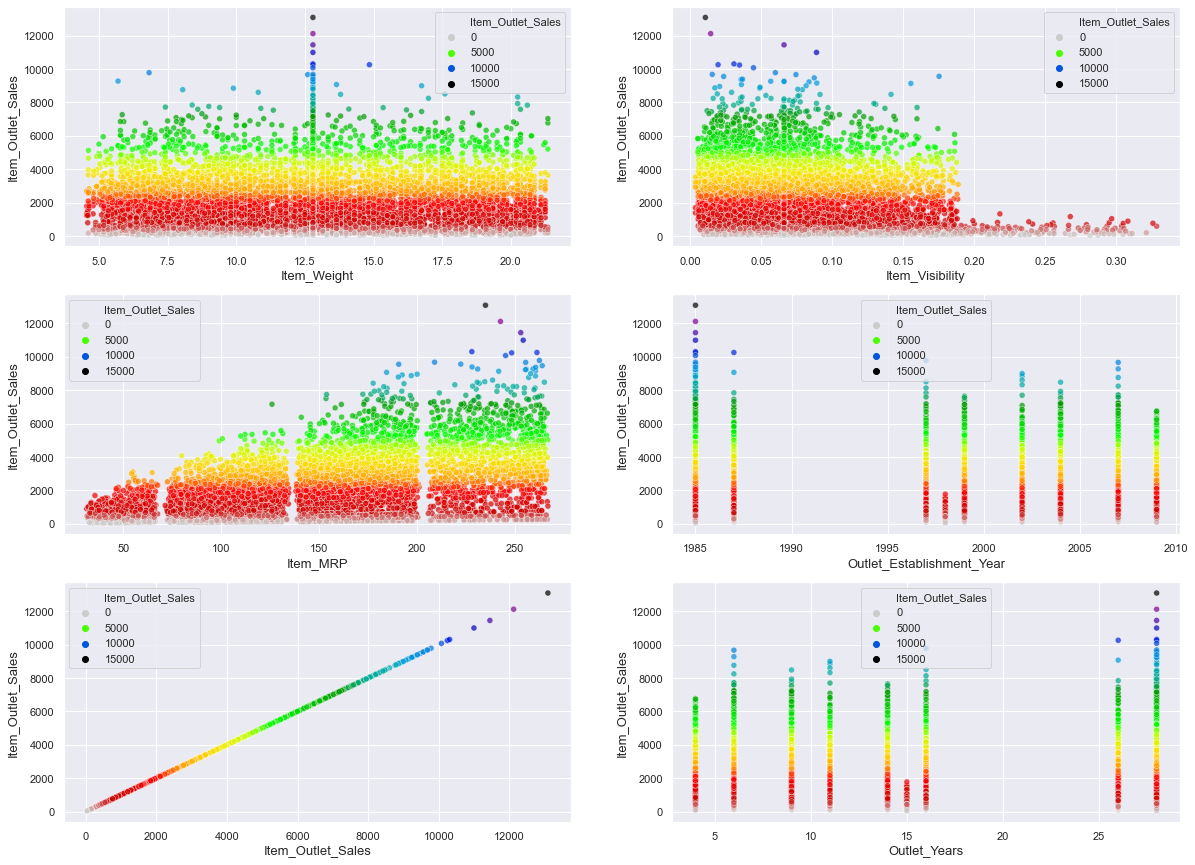

In [32]:
#plotting all numeric features against Item_Outlet_Sales
fig, ax = plt.subplots(figsize=(20,15))
sns.set(style='darkgrid')
length = len(numerical_feats)
for i,feature in enumerate(numerical_feats,1):
    plt.subplot(np.ceil(length/2), 2, i) #nrows,ncols,index
    sns.scatterplot(x = feature, y = 'Item_Outlet_Sales',data=data,alpha=0.7,hue="Item_Outlet_Sales", palette ='nipy_spectral_r',linewidth=0.5, edgecolor='white')
    #sns.regplot(x = feature, y="GRE Score",data=data,color='orange')
    plt.ylabel('Item_Outlet_Sales', fontsize=13)
    plt.xlabel(feature, fontsize=13)
plt.show()

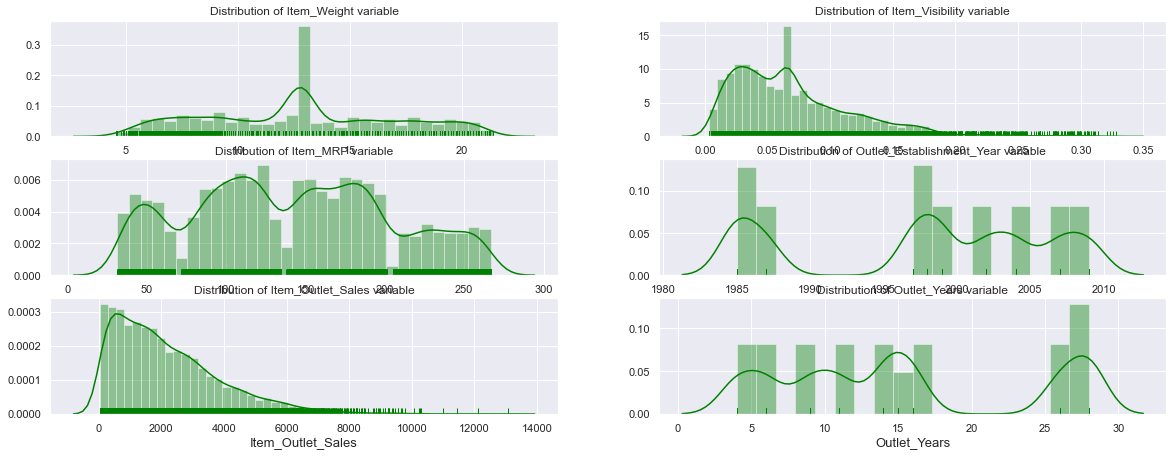

In [28]:
#plotting distributions of all numeric features
fig, ax = plt.subplots(figsize=(20,20))
sns.set(style='darkgrid')
length = len(data.columns)
for i,feature in enumerate(numerical_feats,1):
    plt.subplot(np.ceil(length/2), 2, i) #nrows,ncols,index
    sns.distplot(data[feature], rug=True,color='green')
    plt.xlabel(feature, fontsize=13)
    plt.title("Distribution of {} variable".format(feature))
plt.show()

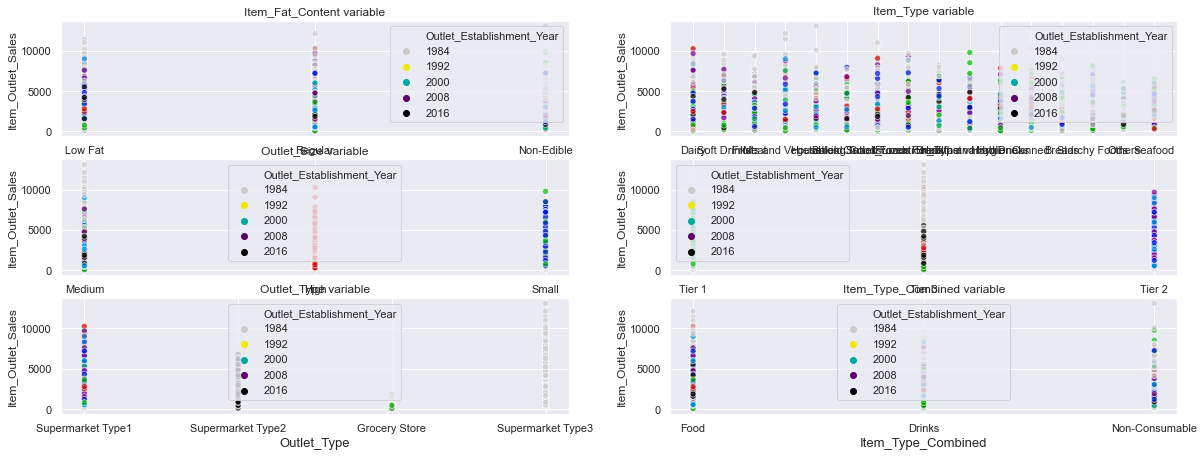

In [27]:
#plotting distributions of all categorical features
fig, ax = plt.subplots(figsize=(20,20))
sns.set(style='darkgrid')
length = len(data.columns)
for i,feature in enumerate(categorical_feats,1):
    plt.subplot(np.ceil(length/2), 2, i) #nrows,ncols,index
    sns.scatterplot(x=feature,y="Item_Outlet_Sales",data=data,alpha=0.7,hue="Outlet_Establishment_Year", palette ='nipy_spectral_r',linewidth=0.8, edgecolor='white')
    #sns.regplot(x = feature, y="GRE Score",data=data,color='orange')
    plt.xlabel(feature, fontsize=13)
    plt.title("{} variable".format(feature))
plt.show()

In [13]:
#Printing Frequency of Categories:
for col in categorical_feats:
  print ("\n Frequency of Categories for variable: %s"%col)
  print (data[col].value_counts())


 Frequency of Categories for variable: Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

 Frequency of Categories for variable: Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

 Frequency of Categories for variable: Outlet_Size
Medium    8671
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

 Frequency of Categories for variable: Outlet_Location_Type
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dty

In [14]:
#Missing values treatment for Item_Visibility, filling with mean value
#data = data.set_index(data['Item_Visibility'])
data['Item_Visibility'] = data["Item_Visibility"].replace(0,data['Item_Visibility'].mean())
#print (data.loc[data['Item_Visibility']==0].count())
print ('0 Values after modification %s' %sum(data['Item_Visibility']==0))


0 Values after modification 0


In [15]:
#Get the first two characters of ID:
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])
#Rename them to more intuitive categories:
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
data['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

In [16]:
#Years:
data['Outlet_Years'] = 2013 - data['Outlet_Establishment_Year']
data['Outlet_Years'].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

In [17]:
#Change categories of low fat:
print ('Original Categories:')
print (data['Item_Fat_Content'].value_counts())

print ('\nModified Categories:')
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                             'reg':'Regular',
                                                             'low fat':'Low Fat'})
print (data['Item_Fat_Content'].value_counts())

Original Categories:
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Modified Categories:
Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


In [18]:
#Mark Non-Consumables as seperate categary in low_fat
data.loc[data['Item_Type_Combined']=="Non-Consumable","Item_Fat_Content"]="Non-Edible"
data['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

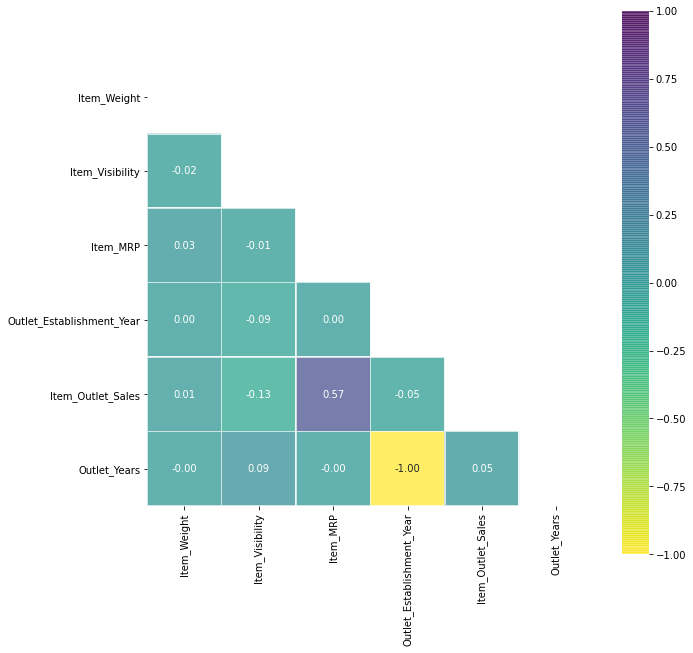

In [23]:
#Lets look at Correltion matrix between numerical variables
data_temp = data[numerical_feats].astype('float64')

#print(data_temp)
corr_mat = data_temp.corr()
self_corr = np.zeros_like(corr_mat)
self_corr[np.triu_indices_from(self_corr)] = True
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap (corr_mat, square = True,cmap="viridis_r",alpha=0.7,linewidth=0.5,edgecolor='white',fmt=".2f", annot=True,mask=self_corr)

In [33]:
#Step 6: numerical and hot encoding
#Lets start with coding all categorical variables as numeric using ‘LabelEncoder’ from sklearn’s preprocessing module.
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
#new Variable for Outlet

data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']

le = LabelEncoder()
for i in var_mod:
  data[i] = le.fit_transform(data[i])

In [34]:
#one hot encoding
data = pd.get_dummies(data, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet'])
data.dtypes


Item_Identifier               object
Item_Weight                  float64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
source                        object
Outlet_Years                   int64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Item_Type_Combined_0           uint8
Item_Type_Combined_1           uint8
Item_Type_Combined_2           uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Outlet_0                       uint8
O

In [35]:
data[['Item_Fat_Content_0','Item_Fat_Content_1','Item_Fat_Content_2']].head(10)

,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2
0,1,0,0
1,0,0,1
2,1,0,0
3,0,0,1
4,0,1,0
5,0,0,1
6,0,0,1
7,1,0,0
8,0,0,1
9,0,0,1


In [36]:
#Step 7: Convert data back into train and test set
#Dropping columns which have been converted to different types
data.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

#Divinde in Test and train
train = data.loc[data['source']=='train']
test = data.loc[data['source']=='test']

#Drop Unnecessary columns

test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

#Export files as modified versions:
train.to_csv("train_modified.csv",index=False)
test.to_csv("test_modified.csv",index=False)

/Users/apple/.pyenv/versions/3.7.7/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [37]:
#Model Building
#Lets start by making a baseline model. Baseline model is the one which requires no predictive model and 
#its like an informed guess. For instance, in this case lets predict the sales as the overall average sales. 

mean_sales = train['Item_Outlet_Sales'].mean()

#Define Dataframe with ID's for Submission

base1 = test[['Item_Identifier','Outlet_Identifier']]

base1['Item_Outlet_Sales'] = mean_sales




/Users/apple/.pyenv/versions/3.7.7/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [38]:
#I would like to define a generic function which takes the algorithm and data as input and makes the model, performs cross-validation and generates submission.
#Define Target & ID Columns

target = 'Item_Outlet_Sales'
IDcol = ['Item_Identifier','Outlet_Identifier']

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score



def modelfit(alg, dtrain, dtest, predictors, target, IDcol, filename):
  #fit the algorithm to the data
  alg.fit(dtrain[predictors],dtrain[target])
  
  #Predict training set:
  dtrain_predictions = alg.predict(dtrain[predictors])
  
  #Perform Cross Validation
  cv_score = cross_val_score(alg, dtrain[predictors], dtrain[target], cv=20, scoring ='neg_mean_squared_error')
  cv_score = np.sqrt(np.abs(cv_score))
  
  #print model report
  
  print ("\nModel Report:")
  print ("RMSE: %.4g"%np.sqrt(metrics.mean_squared_error(dtrain[target].values,dtrain_predictions)))
# print ("CV Score: Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" %np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score))
  print ("CV Score: Mean - {0} | Std - {1} | Min - {2} | Max - {3}".format(np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))

  #Predict on Test Data
  dtest[target] = alg.predict(dtest[predictors])
  
  IDcol.append(target)
  
  submission = pd.DataFrame({x: dtest[x] for x in IDcol})
  submission.to_csv(filename, index=False)
  
  
  
#linear_reg = LinearRegression()
#linear_reg.fit(X_train,y)
#mean_sq_er = cross_val_score(linear_reg,X_train,y,scoring='neg_mean_squared_error',cv=5)
#rmse_lin = rmse_cross_val(linear_reg)
#print("Mean Squared Error",mean_sq_er.mean())
#print("Root Mean Squared Error",rmse_lin.mean())
  
  

**Linear Regression Model**


Model Report:
RMSE: 1128
CV Score: Mean - 1128.91522149673 | Std - 43.474123677755706 | Min - 1074.1111380706102 | Max - 1211.0569232818118


/Users/apple/.pyenv/versions/3.7.7/lib/python3.7/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


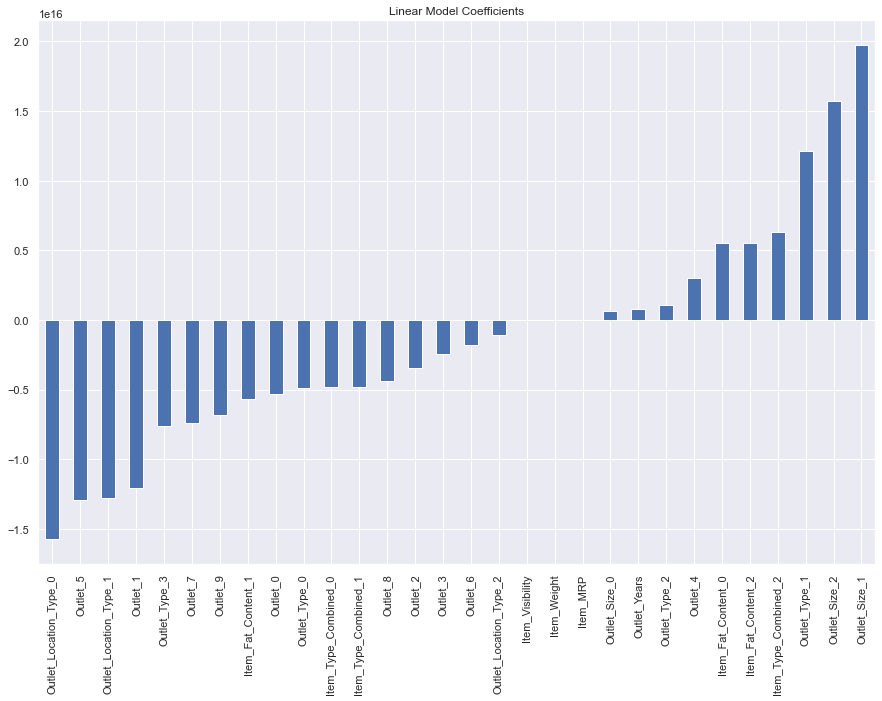

In [39]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
predictors = [x for x in train.columns if x not in [target]+IDcol]

#Print Predictors

alg1 = LinearRegression(normalize=True)
modelfit(alg1, train, test, predictors, target, IDcol,'1-lr.csv' )
coef1 = pd.Series(alg1.coef_, predictors).sort_values()
plt.figure(figsize=(15,10))
coef1.plot(kind='bar', title="Linear Model Coefficients")



Model Report:
RMSE: 1129
CV Score: Mean - 1129.652165166341 | Std - 44.74652064475393 | Min - 1075.621179002736 | Max - 1217.1944094415167


/Users/apple/.pyenv/versions/3.7.7/lib/python3.7/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


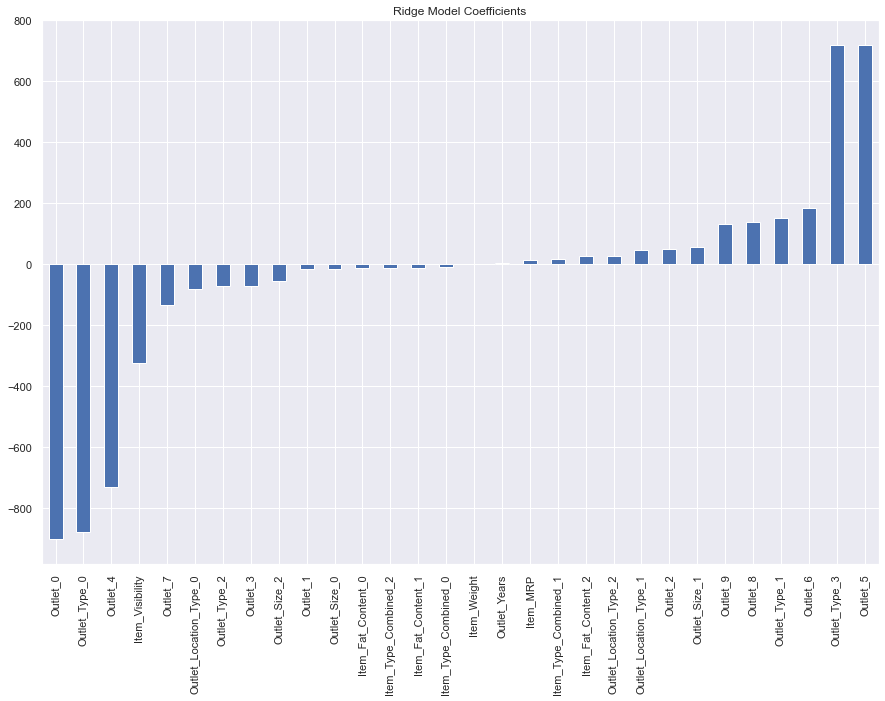

In [40]:
#Ridge Regression Model:
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg2 = Ridge(alpha=0.05, normalize=True)
modelfit(alg2, train, test, predictors, target, IDcol,'2-ridge.csv' )
coef2 = pd.Series(alg2.coef_, predictors).sort_values()
plt.figure(figsize=(15,10))
coef2.plot(kind='bar', title="Ridge Model Coefficients")


Model Report:
RMSE: 1060
CV Score: Mean - 1091.3013883930987 | Std - 45.26683801363775 | Min - 1014.1018329152275 | Max - 1180.9489426785285


/Users/apple/.pyenv/versions/3.7.7/lib/python3.7/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


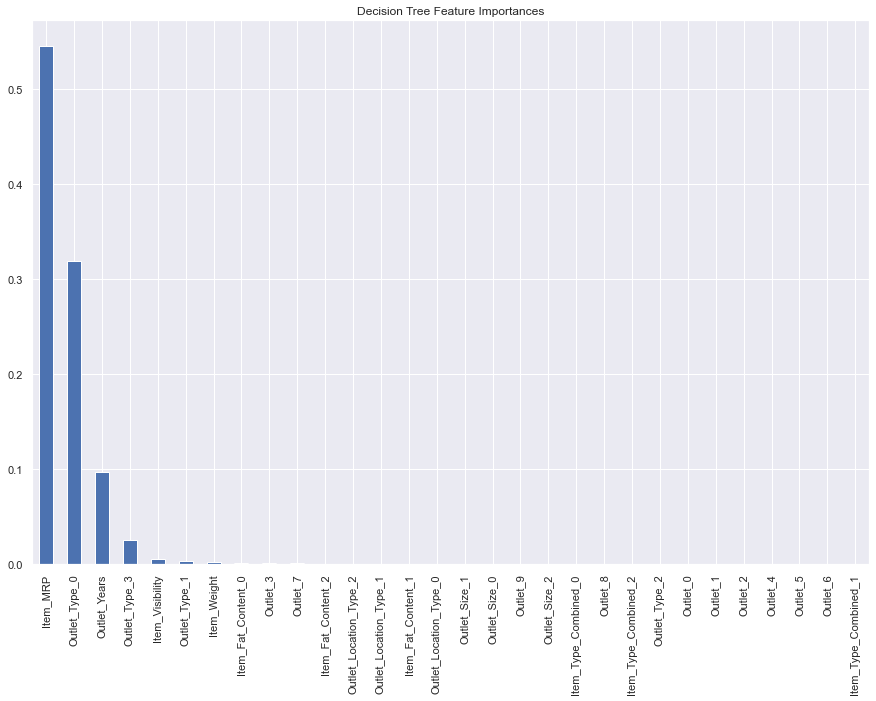

In [41]:
#Decision Tree Model
from sklearn.tree import DecisionTreeRegressor
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg3 = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
modelfit(alg3, train, test, predictors, target, IDcol,'3-decision-tree.csv' )
coef3 = pd.Series(alg3.feature_importances_, predictors).sort_values(ascending=False)
plt.figure(figsize=(15,10))
coef3.plot(kind='bar', title="Decision Tree Feature Importances")


Here you can see that the RMSE is 1058 and the mean CV error is 1091. This tells us that the model is slightly overfitting. Lets try making a decision tree with just top 4 variables, a max_depth of 8 and min_samples_leaf as 150.




Model Report:
RMSE: 1071
CV Score: Mean - 1096.1065402097997 | Std - 43.30211900031146 | Min - 1027.3440164414137 | Max - 1171.5022305730886


/Users/apple/.pyenv/versions/3.7.7/lib/python3.7/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


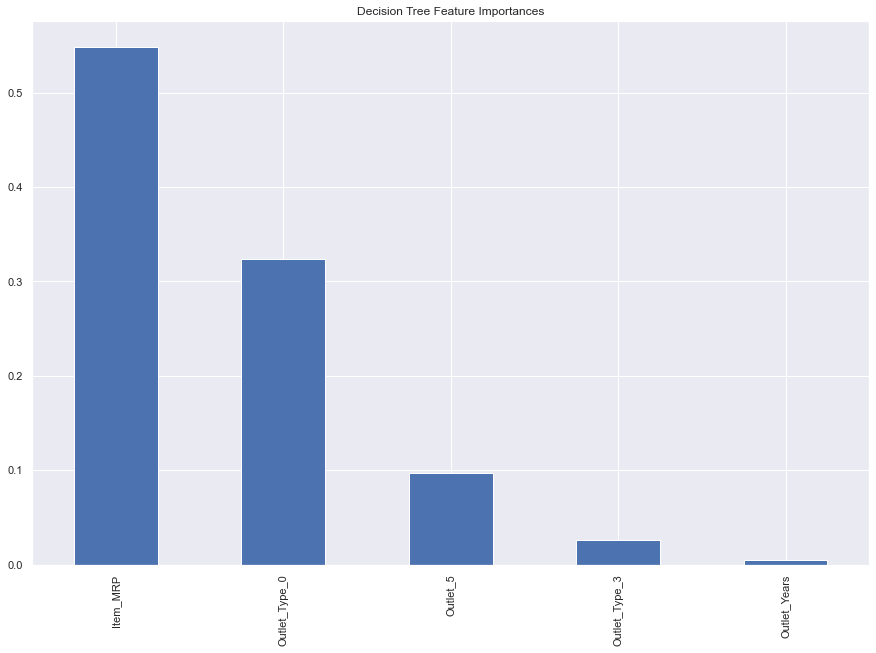

In [42]:
predictors = ['Item_MRP','Outlet_Type_0','Outlet_Type_3','Outlet_5','Outlet_Years']
alg4 = DecisionTreeRegressor(max_depth=8, min_samples_leaf=150)
modelfit(alg4, train, test, predictors, target, IDcol,'4-decision-tree.csv' )
coef4 = pd.Series(alg4.feature_importances_, predictors).sort_values(ascending=False)
plt.figure(figsize=(15,10))
coef4.plot(kind='bar', title="Decision Tree Feature Importances")


Model Report:
RMSE: 1073
CV Score: Mean - 1083.5739186465453 | Std - 43.89935290867029 | Min - 1018.8727902419981 | Max - 1161.8745781833422


/Users/apple/.pyenv/versions/3.7.7/lib/python3.7/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


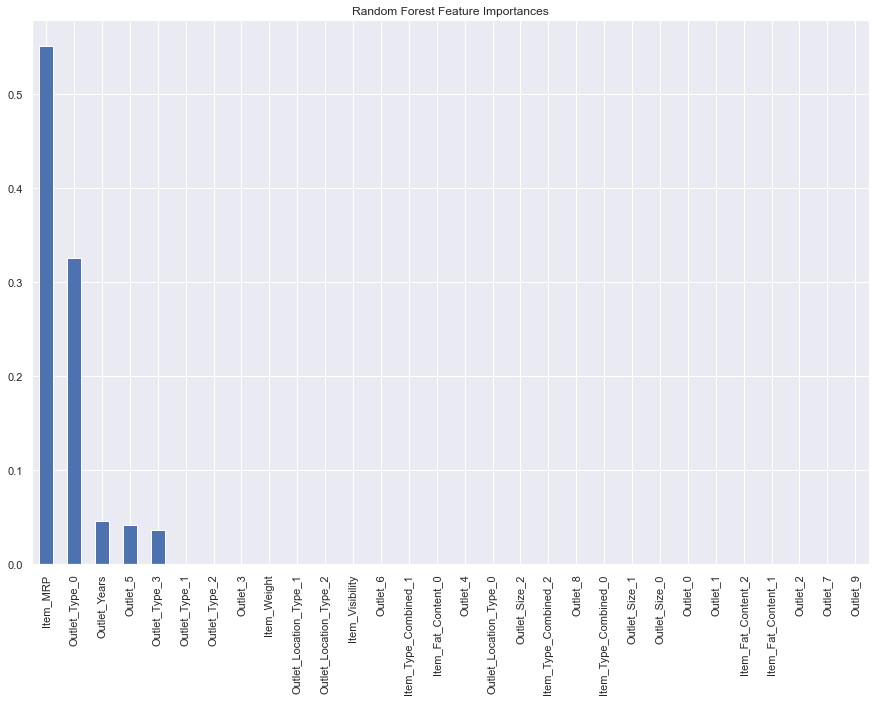

In [43]:
#Random Forest Model
from sklearn.ensemble import RandomForestRegressor
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg5 = RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100, n_jobs=4)
modelfit(alg5, train, test, predictors, target, IDcol,'5-random-forest.csv' )
coef5 = pd.Series(alg5.feature_importances_, predictors).sort_values(ascending=False)
plt.figure(figsize=(15,10))
coef5.plot(kind='bar', title="Random Forest Feature Importances")


Model Report:
RMSE: 1068
CV Score: Mean - 1082.4670624852574 | Std - 43.26034161190183 | Min - 1019.595674868163 | Max - 1158.7190994483083


/Users/apple/.pyenv/versions/3.7.7/lib/python3.7/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


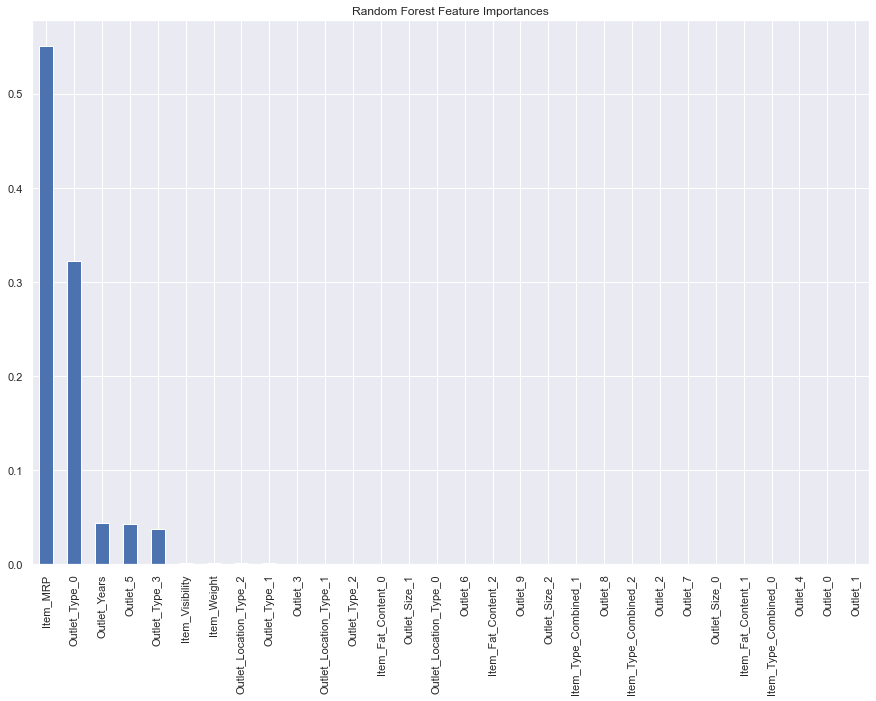

In [44]:
#Random Forest Model - revised
from sklearn.ensemble import RandomForestRegressor
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg6 = RandomForestRegressor(n_estimators=400,max_depth=6, min_samples_leaf=100, n_jobs=4)
modelfit(alg6, train, test, predictors, target, IDcol,'6-random-forest.csv' )
coef6 = pd.Series(alg6.feature_importances_, predictors).sort_values(ascending=False)
plt.figure(figsize=(15,10))
coef6.plot(kind='bar', title="Random Forest Feature Importances")